In [1]:
import numpy as np
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras import layers

import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

tf.config.experimental.enable_op_determinism()
tf.__version__

2023-09-25 20:21:48.571576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 20:21:53.238729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.13.0'

In [2]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
shap.initjs()

In [4]:
subject = 'Paraná - Consumo de Cimento (t)'
split_index = 12 #Referente aos 13 anos de input  

In [5]:
data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_PR.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data = data.drop('Paraná - Produção de Cimento (t)', axis=1)
data
# old_data = pd.read_csv('../../Inputs Atuais/2008_01_model_input_PR.csv')
# old_data = old_data[[col for col in old_data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
# bcb_columns = ['Paraná - Produção de Cimento (t)',
#                'Contratação Comercial (Bi R$)',
#                'Contratação  Home equity (Bi R$)',
#                'Contratação  Livre (Bi R$)',
#                'Contratação  FGTS (Bi R$)',
#                'Contratação  SFH (Bi R$)',
#                'Contratação Jurídico Comercial (Bi R$)',
#                'Contratação Jurídico FGTS (Bi R$)',
#                'Contratação Jurídico Livre (Bi R$)',
#                'Contratação Jurídico SFH (Bi R$)',
#                'Direcionamento Aquisição (R$)',
#                'Direcionamento Construção (R$)',
#                'Direcionamentos Reformas e Ampliações (R$)',
#                'Direcionamento Aplicação (R$)',
#                'Ativos Problemáticos - Comercial (R$)',
#                'Ativos Problemáticos - Home equity (R$)',
#                'Ativos Problemáticos - Livre (R$)',
#                'Ativos Problemáticos - SFH (R$)',
#                'Ativos Problemáticos - FGTS (R$)',
#                'Ativos Problemáticos P.Jurídica - Comercial (R$)',
#                'Ativos Problemáticos P.Jurídica - Home equity (R$)',
#                'Ativos Problemáticos P.Jurídica - Livre (R$)',
#                'Ativos Problemáticos P.Jurídica - SFH (R$)',
#                'Carteira de Crédito - Comercial (R$)',
#                'Carteira de Crédito – Home equity (R$)',
#                'Carteira de Crédito – Livre (R$)',
#                'Carteira de Crédito - FGTS (R$)',
#                'Carteira de Crédito - SFH  (R$)',
#                'Carteira de Crédito P.Jurídica - Comercial (R$)',
#                'Carteira de Crédito P.Jurídica - Home equity (R$)',
#                'Carteira de Crédito P.Jurídica -  Livre (R$)',
#                'Carteira de Crédito  P.Jurídica - FGTS (R$)',
#                'Inadimplência - SFH (%)','Inadimplência - FGTS (%)',
#                'Inadimplência - Livre (%)','Inadimplência - Comercial (%)',
#                'Inadimplência - Home equity (%)','Inadimplência P.Jurídica - SFH (%)',
#                'Inadimplência P.Jurídica - FGTS (%)','Inadimplência P.Jurídica - Livre (%)',
#                'Inadimplência P.Jurídica - Comercial (%)','Poupança e Empréstimo - SBPE (R$)',
#                ' Títulos - LH (R$)',' Títulos – LIG (R$)',' Títulos – CRI (R$)',
#                ' Títulos – LCI (R$)','Imóvel Área - Privativa (m²)',
#                'Imóvel Área - Total (m²)','Número de Apartamentos',
#                'Número de Casas','Valor Imóveis - Avaliação (R$)',
#                'Valor Imóveis - Compra (R$)','Quantidade de imóves - Condomínio',
#                'Quantidade de imóves – Isolado']
# data = old_data.drop(bcb_columns, axis=1)
# data

,Ano,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,...,NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Paraná - Consumo de Cimento (t)
0,2008,8.033948,0.782138,0.768548,2.148670e+08,1.122835e+07,17.780948,1.878837e+08,0.745648,0.834122,...,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583,3001.521000
1,2009,8.063370,0.782910,0.767137,2.163260e+08,1.133139e+07,17.787925,1.879466e+08,0.748601,0.835310,...,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189,3092.068000
2,2010,8.026843,0.783594,0.766111,2.218671e+08,1.138377e+07,17.886000,1.893914e+08,0.751387,0.835940,...,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804,3749.448000
3,2011,8.013806,0.784190,0.765458,2.270561e+08,1.138563e+07,17.967281,1.906364e+08,0.753998,0.836020,...,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995,4174.942000
4,2012,6.472496,0.784389,0.764921,2.317175e+08,1.133915e+07,18.011636,1.916091e+08,0.755977,0.835445,...,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425,4522.969000
5,2013,7.011799,0.785421,0.765581,2.358269e+08,1.122742e+07,18.040420,1.923917e+08,0.759142,0.834565,...,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730,4578.716000
6,2014,7.462443,0.785706,0.765963,2.386532e+08,1.115283e+07,18.028052,1.924772e+08,0.760987,0.833112,...,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460,4341.821857
7,2015,7.813261,0.785515,0.766043,2.410111e+08,1.107686e+07,18.031270,1.926648e+08,0.762152,0.831122,...,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966,4108.786286
8,2016,7.840669,0.788366,0.758774,2.424341e+08,1.101317e+07,18.026717,1.926914e+08,0.771114,0.838386,...,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375,3869.334857
9,2017,7.553100,0.787582,0.759026,2.428100e+08,1.097443e+07,18.022550,1.926406e+08,0.770943,0.835784,...,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856,3764.518000


In [13]:
input_data = data.iloc[:-2, 1:-1]
input_data

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,8.033948,0.782138,0.768548,2.148670e+08,1.122835e+07,17.780948,1.878837e+08,0.745648,0.834122,5.483335e+08,...,-7723.574973,2.868108,11.760983,17.558665,912.624708,1226.296848,18.012164,13.653739,78.027482,2.236583
1,8.063370,0.782910,0.767137,2.163260e+08,1.133139e+07,17.787925,1.879466e+08,0.748601,0.835310,5.302764e+08,...,-8961.781709,2.305885,9.472585,16.652522,912.466179,1217.653383,17.954863,13.668549,78.238643,2.155189
2,8.026843,0.783594,0.766111,2.218671e+08,1.138377e+07,17.886000,1.893914e+08,0.751387,0.835940,5.046425e+08,...,-9895.682385,1.958246,9.332485,17.928528,912.482023,1194.060192,17.703414,13.001948,76.311573,2.092804
3,8.013806,0.784190,0.765458,2.270561e+08,1.138563e+07,17.967281,1.906364e+08,0.753998,0.836020,4.854622e+08,...,-9989.170714,2.079088,10.985689,18.661309,912.629463,1182.416452,17.710041,12.630186,74.615878,2.043995
4,6.472496,0.784389,0.764921,2.317175e+08,1.133915e+07,18.011636,1.916091e+08,0.755977,0.835445,4.867661e+08,...,-9429.326328,2.183282,8.159014,19.310061,912.778766,1176.491125,17.874291,12.612094,73.865245,1.941425
5,7.011799,0.785421,0.765581,2.358269e+08,1.122742e+07,18.040420,1.923917e+08,0.759142,0.834565,5.225848e+08,...,-7157.441850,2.403445,7.913561,19.233593,912.914618,1170.878793,18.105264,12.720105,73.487865,1.844730
6,7.462443,0.785706,0.765963,2.386532e+08,1.115283e+07,18.028052,1.924772e+08,0.760987,0.833112,5.676413e+08,...,-3453.461327,2.748397,10.350442,20.725057,912.973266,1150.562966,18.275455,13.157699,74.605015,1.851460
7,7.813261,0.785515,0.766043,2.410111e+08,1.107686e+07,18.031270,1.926648e+08,0.762152,0.831122,5.179392e+08,...,-1442.919387,2.501529,12.454398,22.054778,913.057535,1145.712487,18.177724,13.346348,75.170150,1.905966
8,7.840669,0.788366,0.758774,2.424341e+08,1.101317e+07,18.026717,1.926914e+08,0.771114,0.838386,4.524144e+08,...,-3128.377228,2.073464,13.111908,22.315526,913.132268,1158.573328,18.115048,13.261122,74.043778,1.933375
9,7.553100,0.787582,0.759026,2.428100e+08,1.097443e+07,18.022550,1.926406e+08,0.770943,0.835784,4.213689e+08,...,-5386.337108,2.177386,9.479812,21.977949,913.165670,1160.957791,18.281050,13.470416,73.546507,1.889856


In [14]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-1)
target_data

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
12    4784.413000
13    4538.256000
14            NaN
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [15]:
# input para treinamento
train_input = (input_data.iloc[:-1] - np.mean(input_data.iloc[:-1], axis=0)) / np.std(input_data.iloc[:-1], axis=0)
train_input 

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,0.954430,-1.699678,1.331277,-1.806944,0.348365,-2.042958,-1.906928,-1.621982,-0.042462,1.204752,...,-0.569731,2.026352,0.984445,-1.266771,-0.975425,1.940409,-0.268956,1.137644,1.835993,2.079287
1,1.017927,-1.261317,0.939993,-1.661370,1.009092,-1.965533,-1.871184,-1.293295,0.429908,0.820657,...,-0.838980,0.085558,-0.051710,-1.745665,-1.582298,1.579454,-0.539264,1.176616,1.956737,1.461930
2,0.939098,-0.873574,0.655199,-1.108495,1.345008,-0.877208,-1.049479,-0.983091,0.680031,0.275392,...,-1.042057,-1.114490,-0.115145,-1.071300,-1.521642,0.594192,-1.725446,-0.577589,0.854816,0.988761
3,0.910963,-0.535386,0.474312,-0.590757,1.356922,0.024771,-0.341452,-0.692424,0.712066,-0.132596,...,-1.062386,-0.697344,0.633403,-0.684027,-0.957222,0.107944,-1.694185,-1.555909,-0.114802,0.618558
4,-2.415320,-0.422527,0.325283,-0.125660,1.058841,0.516968,0.211766,-0.472052,0.483303,-0.104860,...,-0.940648,-0.337667,-0.646476,-0.341164,-0.385670,-0.139500,-0.919352,-1.603519,-0.544022,-0.159410
5,-1.251457,0.163252,0.508405,0.284361,0.342383,0.836388,0.656850,-0.119710,0.133711,0.657046,...,-0.446625,0.422337,-0.757614,-0.381577,0.134391,-0.373874,0.170234,-1.319280,-0.759813,-0.892823
6,-0.278927,0.325010,0.614316,0.566357,-0.135907,0.699136,0.705450,0.085716,-0.443735,1.615453,...,0.358807,1.613108,0.345772,0.406656,0.358905,-1.222272,0.973093,-0.167721,-0.121014,-0.841773
7,0.478169,0.216545,0.636582,0.801625,-0.623089,0.734849,0.812173,0.215483,-1.234902,0.558230,...,0.796000,0.760923,1.298413,1.109410,0.681498,-1.424830,0.512055,0.328724,0.202137,-0.428361
8,0.537319,1.834498,-1.380170,0.943598,-1.031518,0.684323,0.827306,1.213246,1.652199,-0.835563,...,0.429496,-0.716758,1.596124,1.247214,0.967586,-0.887756,0.216390,0.104443,-0.441935,-0.220470
9,-0.083280,1.389158,-1.310222,0.981108,-1.279958,0.638087,0.798387,1.194161,0.618336,-1.495939,...,-0.061498,-0.358019,-0.048438,1.068806,1.095455,-0.788179,0.999483,0.655217,-0.726280,-0.550555


In [16]:
# Alvo para treinamento
train_target = target_data.iloc[:split_index]
train_target

0     3092.068000
1     3749.448000
2     4174.942000
3     4522.969000
4     4578.716000
5     4341.821857
6     4108.786286
7     3869.334857
8     3764.518000
9     3773.354000
10    3786.974000
11    4235.532000
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [17]:
#input de test (Ano 2021)
test_input = ((input_data - np.mean(input_data, axis=0)) / np.std(input_data, axis=0)).iloc[-1:]
test_input

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
12,-0.734266,-1.069894,-1.42466,0.465024,-0.914446,-0.223777,0.114326,1.035451,-2.637193,1.108405,...,0.964765,-1.482779,-2.260447,0.964616,0.339314,-0.540552,0.224215,0.839814,-2.237536,-1.155068


In [18]:
# Alvo de test (Ano 2021)
test_target = target_data.iloc[split_index:-2]
test_target

12    4784.413
Name: Paraná - Consumo de Cimento (t), dtype: float64

In [19]:
# Rede neural feed-forward com optmizador Estocástico
def neural_network_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='tanh', input_shape=(train_input.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train_input, 
                      train_target, 
                      epochs=10000,
                      validation_data=(train_input.iloc[-1:], train_target.iloc[-1:]),
                      callbacks=[early_stopping], 
                      verbose=want_verbose)
    return model, history

In [20]:
trained_model, history = neural_network_model(train_input, train_target, want_verbose=1, seed=311622981)

Epoch 1/10000


2023-09-25 20:22:07.241875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-25 20:22:07.343481: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 393ms/step - loss: 16154535.0000 - val_loss: 17177362.0000
Epoch 2/10000
1/1 [==============================] - 0s 22ms/step - loss: 15814456.0000 - val_loss: 14998680.0000
Epoch 3/10000
1/1 [==============================] - 0s 22ms/step - loss: 15435901.0000 - val_loss: 18116346.0000
Epoch 4/10000
1/1 [==============================] - 0s 22ms/step - loss: 14507624.0000 - val_loss: 16833656.0000
Epoch 5/10000
1/1 [==============================] - 0s 19ms/step - loss: 14253463.0000 - val_loss: 18125962.0000
Epoch 6/10000
1/1 [==============================] - 0s 19ms/step - loss: 14769336.0000 - val_loss: 20804324.0000
Epoch 7/10000
1/1 [==============================] - 0s 20ms/step - loss: 13112056.0000 - val_loss: 19481004.0000
Epoch 8/10000
1/1 [==============================] - 0s 22ms/step - loss: 12892397.0000 - val_loss: 19096418.0000
Epoch 9/10000
1/1 [==============================] - 0s 20ms/step - loss: 15020429.0000 - val_loss: 1

1/1 [==============================] - 0s 24ms/step - loss: 4527493.5000 - val_loss: 6391554.5000
Epoch 74/10000
1/1 [==============================] - 0s 24ms/step - loss: 3678385.0000 - val_loss: 4702638.0000
Epoch 75/10000
1/1 [==============================] - 0s 21ms/step - loss: 3526362.0000 - val_loss: 6824147.5000
Epoch 76/10000
1/1 [==============================] - 0s 19ms/step - loss: 4265286.5000 - val_loss: 5465918.5000
Epoch 77/10000
1/1 [==============================] - 0s 21ms/step - loss: 3709375.2500 - val_loss: 5202259.5000
Epoch 78/10000
1/1 [==============================] - 0s 22ms/step - loss: 3675005.2500 - val_loss: 7673000.0000
Epoch 79/10000
1/1 [==============================] - 0s 22ms/step - loss: 3720000.0000 - val_loss: 5419641.0000
Epoch 80/10000
1/1 [==============================] - 0s 20ms/step - loss: 3359734.7500 - val_loss: 6746159.0000
Epoch 81/10000
1/1 [==============================] - 0s 20ms/step - loss: 3727091.2500 - val_loss: 4820415.500

1/1 [==============================] - 0s 20ms/step - loss: 1036701.3125 - val_loss: 2461312.0000
Epoch 146/10000
1/1 [==============================] - 0s 22ms/step - loss: 1362100.6250 - val_loss: 2374053.5000
Epoch 147/10000
1/1 [==============================] - 0s 23ms/step - loss: 897174.6875 - val_loss: 1904248.3750
Epoch 148/10000
1/1 [==============================] - 0s 20ms/step - loss: 1064650.8750 - val_loss: 2353227.2500
Epoch 149/10000
1/1 [==============================] - 0s 20ms/step - loss: 1059996.8750 - val_loss: 2093881.7500
Epoch 150/10000
1/1 [==============================] - 0s 20ms/step - loss: 1192821.5000 - val_loss: 1782618.1250
Epoch 151/10000
1/1 [==============================] - 0s 22ms/step - loss: 1285552.5000 - val_loss: 2533790.7500
Epoch 152/10000
1/1 [==============================] - 0s 20ms/step - loss: 853790.3125 - val_loss: 2681505.5000
Epoch 153/10000
1/1 [==============================] - 0s 21ms/step - loss: 1089300.6250 - val_loss: 18066

Epoch 218/10000
1/1 [==============================] - 0s 22ms/step - loss: 365403.9688 - val_loss: 879095.7500
Epoch 219/10000
1/1 [==============================] - 0s 24ms/step - loss: 397488.5938 - val_loss: 769085.3125
Epoch 220/10000
1/1 [==============================] - 0s 23ms/step - loss: 395491.0000 - val_loss: 787247.2500
Epoch 221/10000
1/1 [==============================] - 0s 21ms/step - loss: 417145.5938 - val_loss: 779910.1875
Epoch 222/10000
1/1 [==============================] - 0s 20ms/step - loss: 372948.0938 - val_loss: 674413.8750
Epoch 223/10000
1/1 [==============================] - 0s 20ms/step - loss: 330246.7188 - val_loss: 793478.1875
Epoch 224/10000
1/1 [==============================] - 0s 20ms/step - loss: 344708.4062 - val_loss: 904975.9375
Epoch 225/10000
1/1 [==============================] - 0s 19ms/step - loss: 354862.5312 - val_loss: 742896.2500
Epoch 226/10000
1/1 [==============================] - 0s 20ms/step - loss: 375415.3750 - val_loss: 6734

1/1 [==============================] - 0s 21ms/step - loss: 229442.6250 - val_loss: 350025.9062
Epoch 292/10000
1/1 [==============================] - 0s 19ms/step - loss: 262063.7344 - val_loss: 420239.4688
Epoch 293/10000
1/1 [==============================] - 0s 20ms/step - loss: 194682.1719 - val_loss: 389407.0938
Epoch 294/10000
1/1 [==============================] - 0s 20ms/step - loss: 220930.4531 - val_loss: 359695.9688
Epoch 295/10000
1/1 [==============================] - 0s 20ms/step - loss: 166342.7188 - val_loss: 338601.2500
Epoch 296/10000
1/1 [==============================] - 0s 20ms/step - loss: 225224.7344 - val_loss: 446363.2812
Epoch 297/10000
1/1 [==============================] - 0s 19ms/step - loss: 198379.4219 - val_loss: 405114.2188
Epoch 298/10000
1/1 [==============================] - 0s 21ms/step - loss: 199017.3594 - val_loss: 444974.3438
Epoch 299/10000
1/1 [==============================] - 0s 24ms/step - loss: 231055.1250 - val_loss: 294479.7812
Epoch 30

1/1 [==============================] - 0s 23ms/step - loss: 158890.6406 - val_loss: 264117.1875
Epoch 365/10000
1/1 [==============================] - 0s 22ms/step - loss: 175787.3750 - val_loss: 307845.3438
Epoch 366/10000
1/1 [==============================] - 0s 21ms/step - loss: 167583.7031 - val_loss: 303016.3750
Epoch 367/10000
1/1 [==============================] - 0s 20ms/step - loss: 164635.0000 - val_loss: 210814.1562
Epoch 368/10000
1/1 [==============================] - 0s 19ms/step - loss: 191779.3125 - val_loss: 173797.3906
Epoch 369/10000
1/1 [==============================] - 0s 20ms/step - loss: 171414.4219 - val_loss: 229896.8438
Epoch 370/10000
1/1 [==============================] - 0s 21ms/step - loss: 170024.6406 - val_loss: 282635.5312
Epoch 371/10000
1/1 [==============================] - 0s 20ms/step - loss: 171927.7344 - val_loss: 189188.2500
Epoch 372/10000
1/1 [==============================] - 0s 20ms/step - loss: 142202.8125 - val_loss: 197456.1250
Epoch 37

1/1 [==============================] - 0s 21ms/step - loss: 150260.3906 - val_loss: 160983.1406
Epoch 438/10000
1/1 [==============================] - 0s 19ms/step - loss: 152445.6719 - val_loss: 214871.1719
Epoch 439/10000
1/1 [==============================] - 0s 19ms/step - loss: 161220.8125 - val_loss: 225715.4688
Epoch 440/10000
1/1 [==============================] - 0s 22ms/step - loss: 151237.3438 - val_loss: 148545.1250
Epoch 441/10000
1/1 [==============================] - 0s 24ms/step - loss: 136187.4375 - val_loss: 127745.3359
Epoch 442/10000
1/1 [==============================] - 0s 21ms/step - loss: 164959.0469 - val_loss: 245492.1875
Epoch 443/10000
1/1 [==============================] - 0s 23ms/step - loss: 154487.4688 - val_loss: 200656.3125
Epoch 444/10000
1/1 [==============================] - 0s 23ms/step - loss: 158228.4219 - val_loss: 161244.7969
Epoch 445/10000
1/1 [==============================] - 0s 20ms/step - loss: 111043.8125 - val_loss: 225024.4531
Epoch 44

1/1 [==============================] - 0s 21ms/step - loss: 165194.9219 - val_loss: 133452.6875
Epoch 511/10000
1/1 [==============================] - 0s 22ms/step - loss: 128307.9453 - val_loss: 149799.6094
Epoch 512/10000
1/1 [==============================] - 0s 19ms/step - loss: 156192.2969 - val_loss: 141102.2031
Epoch 513/10000
1/1 [==============================] - 0s 20ms/step - loss: 139353.8594 - val_loss: 175975.3281
Epoch 514/10000
1/1 [==============================] - 0s 22ms/step - loss: 153287.2656 - val_loss: 119117.5000
Epoch 515/10000
1/1 [==============================] - 0s 20ms/step - loss: 157003.3125 - val_loss: 192045.7344
Epoch 516/10000
1/1 [==============================] - 0s 22ms/step - loss: 159073.2344 - val_loss: 126909.5391
Epoch 517/10000
1/1 [==============================] - 0s 20ms/step - loss: 141579.7969 - val_loss: 155546.6562
Epoch 518/10000
1/1 [==============================] - 0s 22ms/step - loss: 154357.7500 - val_loss: 129950.2188
Epoch 51

1/1 [==============================] - 0s 19ms/step - loss: 154527.7969 - val_loss: 150780.9062
Epoch 584/10000
1/1 [==============================] - 0s 19ms/step - loss: 167646.6875 - val_loss: 101580.7109
Epoch 585/10000
1/1 [==============================] - 0s 21ms/step - loss: 149495.1719 - val_loss: 143198.5000
Epoch 586/10000
1/1 [==============================] - 0s 22ms/step - loss: 136459.2188 - val_loss: 115093.3750
Epoch 587/10000
1/1 [==============================] - 0s 21ms/step - loss: 153673.5000 - val_loss: 139900.8438
Epoch 588/10000
1/1 [==============================] - 0s 19ms/step - loss: 148874.1562 - val_loss: 104883.0000
Epoch 589/10000
1/1 [==============================] - 0s 22ms/step - loss: 151746.7812 - val_loss: 129184.2578
Epoch 590/10000
1/1 [==============================] - 0s 24ms/step - loss: 146281.5469 - val_loss: 136767.6094
Epoch 591/10000
1/1 [==============================] - 0s 24ms/step - loss: 143500.3750 - val_loss: 114887.3984
Epoch 59

1/1 [==============================] - 0s 21ms/step - loss: 130437.5703 - val_loss: 90041.1641
Epoch 657/10000
1/1 [==============================] - 0s 21ms/step - loss: 153250.2969 - val_loss: 145495.1250
Epoch 658/10000
1/1 [==============================] - 0s 22ms/step - loss: 147105.0625 - val_loss: 106427.9141
Epoch 659/10000
1/1 [==============================] - 0s 20ms/step - loss: 149643.1875 - val_loss: 109352.2812
Epoch 660/10000
1/1 [==============================] - 0s 28ms/step - loss: 154600.4688 - val_loss: 124651.4062
Epoch 661/10000
1/1 [==============================] - 0s 26ms/step - loss: 147624.4375 - val_loss: 146054.2188
Epoch 662/10000
1/1 [==============================] - 0s 20ms/step - loss: 134883.6875 - val_loss: 92426.8359
Epoch 663/10000
1/1 [==============================] - 0s 19ms/step - loss: 118540.6328 - val_loss: 155915.4688
Epoch 664/10000
1/1 [==============================] - 0s 19ms/step - loss: 135088.2031 - val_loss: 163960.1406
Epoch 665/

1/1 [==============================] - 0s 20ms/step - loss: 194694.8281 - val_loss: 140514.6094
Epoch 730/10000
1/1 [==============================] - 0s 20ms/step - loss: 171858.1719 - val_loss: 79711.3750
Epoch 731/10000
1/1 [==============================] - 0s 21ms/step - loss: 166764.5781 - val_loss: 90819.6797
Epoch 732/10000
1/1 [==============================] - 0s 19ms/step - loss: 150064.4219 - val_loss: 109981.7812
Epoch 733/10000
1/1 [==============================] - 0s 21ms/step - loss: 160421.8281 - val_loss: 116541.3906
Epoch 734/10000
1/1 [==============================] - 0s 21ms/step - loss: 148237.9844 - val_loss: 101669.7422
Epoch 735/10000
1/1 [==============================] - 0s 20ms/step - loss: 138634.9219 - val_loss: 104256.3047
Epoch 736/10000
1/1 [==============================] - 0s 20ms/step - loss: 140855.1406 - val_loss: 99156.2578
Epoch 737/10000
1/1 [==============================] - 0s 19ms/step - loss: 127064.6016 - val_loss: 129001.8047
Epoch 738/1

1/1 [==============================] - 0s 22ms/step - loss: 160334.0781 - val_loss: 81400.4375
Epoch 803/10000
1/1 [==============================] - 0s 25ms/step - loss: 154562.0781 - val_loss: 134941.0781
Epoch 804/10000
1/1 [==============================] - 0s 23ms/step - loss: 150681.8594 - val_loss: 110186.0703
Epoch 805/10000
1/1 [==============================] - 0s 21ms/step - loss: 142377.9062 - val_loss: 127307.6719
Epoch 806/10000
1/1 [==============================] - 0s 21ms/step - loss: 135403.1406 - val_loss: 120948.5703
Epoch 807/10000
1/1 [==============================] - 0s 20ms/step - loss: 141896.4688 - val_loss: 135196.0781
Epoch 808/10000
1/1 [==============================] - 0s 22ms/step - loss: 152710.5625 - val_loss: 117363.6172
Epoch 809/10000
1/1 [==============================] - 0s 22ms/step - loss: 152528.9844 - val_loss: 150889.7656
Epoch 810/10000
1/1 [==============================] - 0s 23ms/step - loss: 160170.1875 - val_loss: 121671.8672
Epoch 811

1/1 [==============================] - 0s 24ms/step - loss: 144016.1094 - val_loss: 120149.7344
Epoch 876/10000
1/1 [==============================] - 0s 21ms/step - loss: 138455.8750 - val_loss: 131588.9844
Epoch 877/10000
1/1 [==============================] - 0s 20ms/step - loss: 156661.3594 - val_loss: 125554.1328
Epoch 878/10000
1/1 [==============================] - 0s 20ms/step - loss: 144556.2344 - val_loss: 126992.3516
Epoch 879/10000
1/1 [==============================] - 0s 19ms/step - loss: 139691.3594 - val_loss: 135331.2969
Epoch 880/10000
1/1 [==============================] - 0s 22ms/step - loss: 154862.7656 - val_loss: 110762.5312
Epoch 881/10000
1/1 [==============================] - 0s 24ms/step - loss: 146966.3281 - val_loss: 121138.5000
Epoch 882/10000
1/1 [==============================] - 0s 22ms/step - loss: 153665.0625 - val_loss: 123389.4297
Epoch 883/10000
1/1 [==============================] - 0s 23ms/step - loss: 151066.1094 - val_loss: 116502.2188
Epoch 88

1/1 [==============================] - 0s 21ms/step - loss: 151156.8906 - val_loss: 93955.4219
Epoch 949/10000
1/1 [==============================] - 0s 20ms/step - loss: 150074.9375 - val_loss: 110447.3359
Epoch 950/10000
1/1 [==============================] - 0s 22ms/step - loss: 134457.6250 - val_loss: 126717.9219
Epoch 951/10000
1/1 [==============================] - 0s 22ms/step - loss: 139902.8750 - val_loss: 111561.3828
Epoch 952/10000
1/1 [==============================] - 0s 20ms/step - loss: 145853.1406 - val_loss: 132726.2656
Epoch 953/10000
1/1 [==============================] - 0s 20ms/step - loss: 154319.2656 - val_loss: 132521.2344
Epoch 954/10000
1/1 [==============================] - 0s 20ms/step - loss: 121357.4688 - val_loss: 117629.5703
Epoch 955/10000
1/1 [==============================] - 0s 22ms/step - loss: 143748.0312 - val_loss: 112637.4219
Epoch 956/10000
1/1 [==============================] - 0s 27ms/step - loss: 149734.4844 - val_loss: 148569.9688
Epoch 957

1/1 [==============================] - 0s 22ms/step - loss: 167775.1719 - val_loss: 159739.9531
Epoch 1022/10000
1/1 [==============================] - 0s 20ms/step - loss: 155576.1875 - val_loss: 73587.0234
Epoch 1023/10000
1/1 [==============================] - 0s 20ms/step - loss: 151851.3594 - val_loss: 151290.9844
Epoch 1024/10000
1/1 [==============================] - 0s 20ms/step - loss: 150737.6406 - val_loss: 119677.9922
Epoch 1025/10000
1/1 [==============================] - 0s 19ms/step - loss: 138380.6719 - val_loss: 112109.0547
Epoch 1026/10000
1/1 [==============================] - 0s 20ms/step - loss: 140381.7031 - val_loss: 79141.3906
Epoch 1027/10000
1/1 [==============================] - 0s 21ms/step - loss: 148216.4062 - val_loss: 107328.0625
Epoch 1028/10000
1/1 [==============================] - 0s 21ms/step - loss: 132640.6094 - val_loss: 102512.3750
Epoch 1029/10000
1/1 [==============================] - 0s 19ms/step - loss: 144426.5781 - val_loss: 101587.8672
Ep

Epoch 1094/10000
1/1 [==============================] - 0s 21ms/step - loss: 149591.6719 - val_loss: 114215.6172
Epoch 1095/10000
1/1 [==============================] - 0s 24ms/step - loss: 146452.0781 - val_loss: 96724.4922
Epoch 1096/10000
1/1 [==============================] - 0s 27ms/step - loss: 138902.0625 - val_loss: 109935.7969
Epoch 1097/10000
1/1 [==============================] - 0s 22ms/step - loss: 144788.2500 - val_loss: 113878.5625
Epoch 1098/10000
1/1 [==============================] - 0s 24ms/step - loss: 184759.2969 - val_loss: 80645.0469
Epoch 1099/10000
1/1 [==============================] - 0s 27ms/step - loss: 147455.2500 - val_loss: 98623.4453
Epoch 1100/10000
1/1 [==============================] - 0s 22ms/step - loss: 158877.8125 - val_loss: 116189.2734
Epoch 1101/10000
1/1 [==============================] - 0s 20ms/step - loss: 153111.1094 - val_loss: 96330.3672
Epoch 1102/10000
1/1 [==============================] - 0s 19ms/step - loss: 160995.6406 - val_loss:

Epoch 1167/10000
1/1 [==============================] - 0s 21ms/step - loss: 125370.5859 - val_loss: 94918.7500
Epoch 1168/10000
1/1 [==============================] - 0s 22ms/step - loss: 144288.8906 - val_loss: 101908.2500
Epoch 1169/10000
1/1 [==============================] - 0s 20ms/step - loss: 147600.3281 - val_loss: 96886.4375
Epoch 1170/10000
1/1 [==============================] - 0s 21ms/step - loss: 145214.3281 - val_loss: 120483.3906
Epoch 1171/10000
1/1 [==============================] - 0s 23ms/step - loss: 162757.8281 - val_loss: 110035.7109
Epoch 1172/10000
1/1 [==============================] - 0s 21ms/step - loss: 131130.4844 - val_loss: 110074.2656
Epoch 1173/10000
1/1 [==============================] - 0s 22ms/step - loss: 146177.4844 - val_loss: 110031.3359
Epoch 1174/10000
1/1 [==============================] - 0s 20ms/step - loss: 155537.4062 - val_loss: 97570.2109
Epoch 1175/10000
1/1 [==============================] - 0s 19ms/step - loss: 148413.8125 - val_loss

In [21]:
prediction = trained_model.predict(test_input)
print(f"{test_target.values}(test_target) - {prediction}(prediction) = {mean_absolute_error(test_target, prediction)}")

1/1 [==============================] - 0s 53ms/step
[4784.413](test_target) - [[3997.0635]](prediction) = 787.3495234374996


In [22]:
trained_model.save('model_pr.keras')

In [23]:
feature_names = train_input.columns.tolist()
background_df = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)
background_df

,Paraná - Desemprego,Paraná - IDH,Paraná - IDH Renda,Paraná - PIB - Estadual,Paraná - PIB - Construção Civil,Paraná - PIB - Per Capita,Paraná - PIB - Preços de Mercado,Paraná - IDH Educacao,Paraná - IDH Longevidade,Contratação Comercial (Bi R$),...,NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),Taxa Selic (%),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def f(X):
    model = tf.keras.models.load_model('model_pr.keras')
    return model.predict(X)

In [25]:
explainer = shap.KernelExplainer(f, background_df)
explainer

1/1 [==============================] - 0s 33ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[  0.        ,  -6.96418198, -13.64322739,  -3.54807   ,
          0.        ,   0.        ,   0.        ,  -3.48707947,
         -5.94501015,  -4.2835378 ,  19.70438603,  -6.84518103,
        -10.89078936,   0.        ,  -8.27932789, -14.25106828,
        -17.35147085, -12.97153809,  12.51969481,  -1.87547109,
         -7.08909555,  -2.79073684,  -8.48204501, -15.33717406,
        -10.96084817,   0.        ,  -3.58883453,  -1.08997585,
          0.        ,   0.        ,   0.        ,  -0.5762127 ,
        -12.53640974,  -4.60894693, -10.86823435,   0.28943527,
         13.43759454,  -6.50845906,   0.        ,   0.        ,
          0.        ,  -4.53911303,  -7.56685584,   0.        ,
         -5.07537612,   0.        ,  -7.56824633,   0.        ,
          0.        ,   0.        ,  -9.84559268,   0.        ,
          0.        , -14.17074156,  -7.02276899,   0.        ,
          0.        ,  -5.0900894 ,  -3.15986627,   0.        ,
         -6.55885524, -11.44620235,   0.

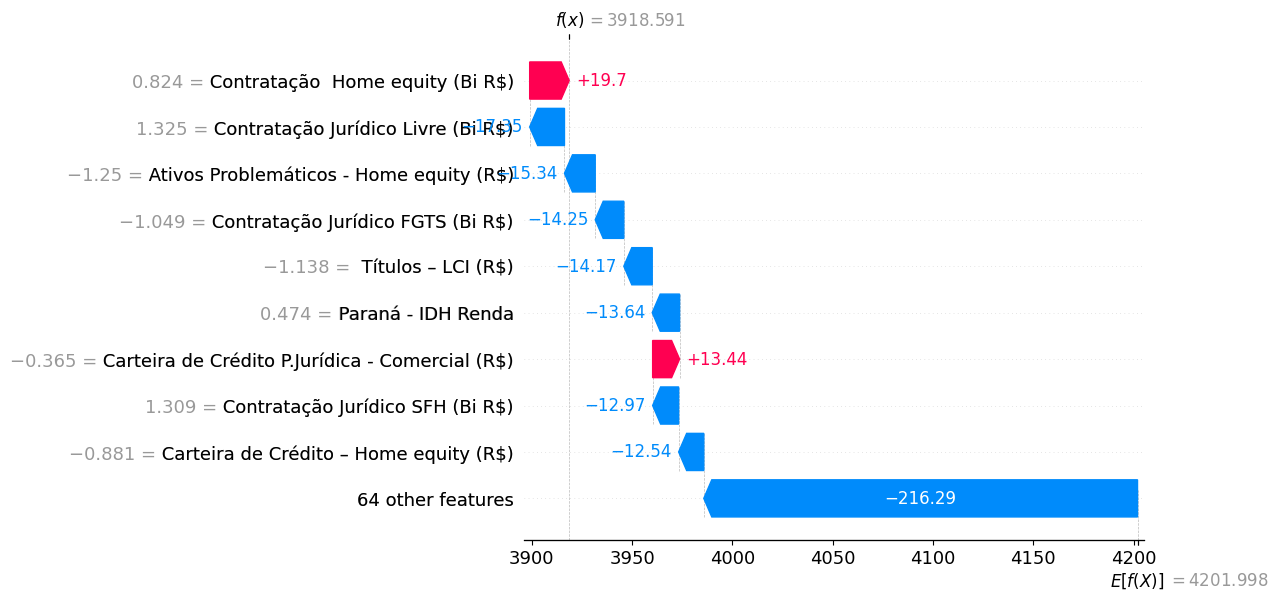

None

'TARGET: 4522.969'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[ 11.46815377,  -8.78108485,   3.09871699,  -4.22660074,
        -11.837886  ,  19.68569817,   6.36328086,   0.        ,
          0.        ,   0.        ,  -8.46475264,   0.        ,
        -16.78890185,  -5.4276522 ,  -6.88615394,   0.        ,
        -15.12447726,  -9.05347904, -10.11849908,  -5.40429328,
          0.        ,  10.52465259, -14.68275746, -19.57940051,
        -17.14267913, -13.10885532,  -4.19835871,   0.        ,
          6.29021155,  17.7681614 ,  -1.88612845,  -2.89737818,
         -9.22939478,   0.        ,  -8.69229719,  -9.42810062,
          3.70786295,  -3.57685851,   5.36053762,  15.69159613,
         -5.10582867, -10.35954845, -13.47965456,   5.70563596,
        -14.06992521,   6.17934341,   0.        ,   0.        ,
         -3.78620604,  -0.94784438, -10.40774279,  10.63885426,
          0.        , -11.89449027,  -6.37098039,  -6.82748431,
          8.48081698,  -5.43029657,   0.        ,   0.        ,
         -1.00621457,   0.        ,   0.

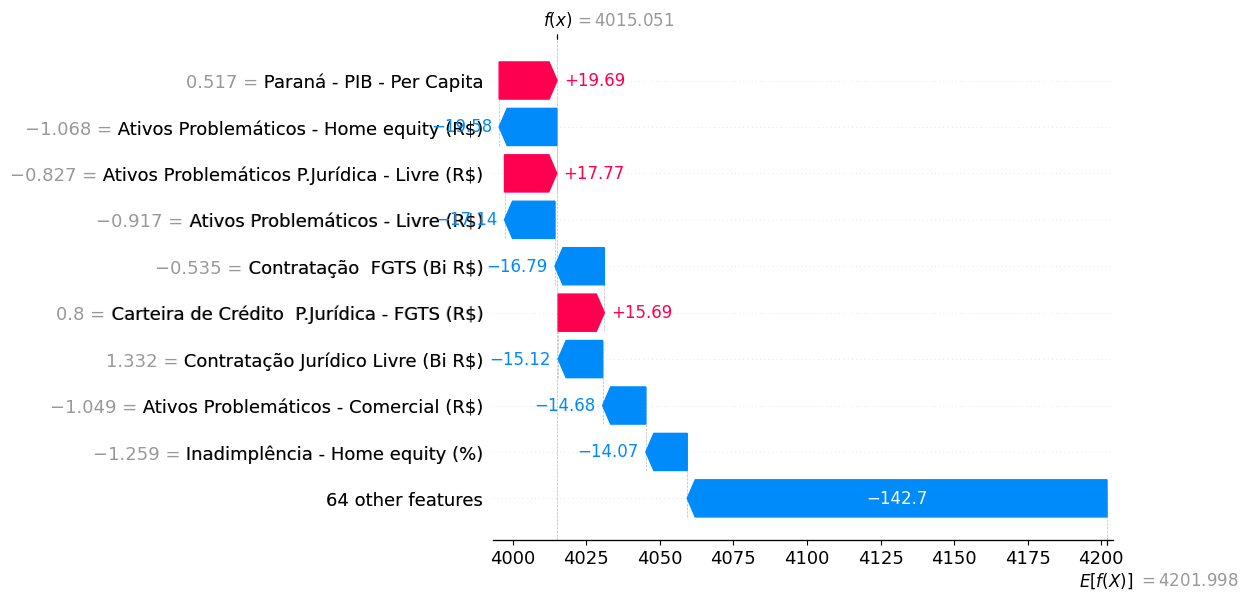

None

'TARGET: 4578.716'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[ 13.51959085,   9.68808803,  -5.81132721,  14.28302989,
         -6.2866651 ,  24.26489233,  25.12635356,   0.        ,
         -2.12549717,  -1.25374877,  -8.54953128,  -5.18169157,
         -7.06577168, -12.32640081, -20.93559132,  -7.57858253,
         -8.92704339, -16.61478259,  -7.28539609,  -9.40967753,
        -10.0722955 ,   9.56068203, -14.49356123, -15.01655234,
        -10.5661332 ,  -3.36709898,  -3.73815832,  -5.27947913,
         -9.44202319,   4.84317741,   2.22355156, -15.31168091,
          8.12886514,  -7.58033003,  -4.62303905,   8.2525652 ,
         -5.48783654, -10.76663051,  10.55690374,  13.51904905,
         -1.08537599,  -6.29822995, -11.79567748,  -7.31674527,
        -20.66023993,   0.        , -17.39720275,   0.        ,
          1.93999859,   9.26244091,  -8.81499355,  18.8935698 ,
        -10.3255725 ,  -4.40968379,  -9.6848597 , -10.12043948,
         -7.9306532 ,  -2.74454012,  -3.35891365, -12.7674472 ,
         -3.82820822,  -1.64204589,  28.

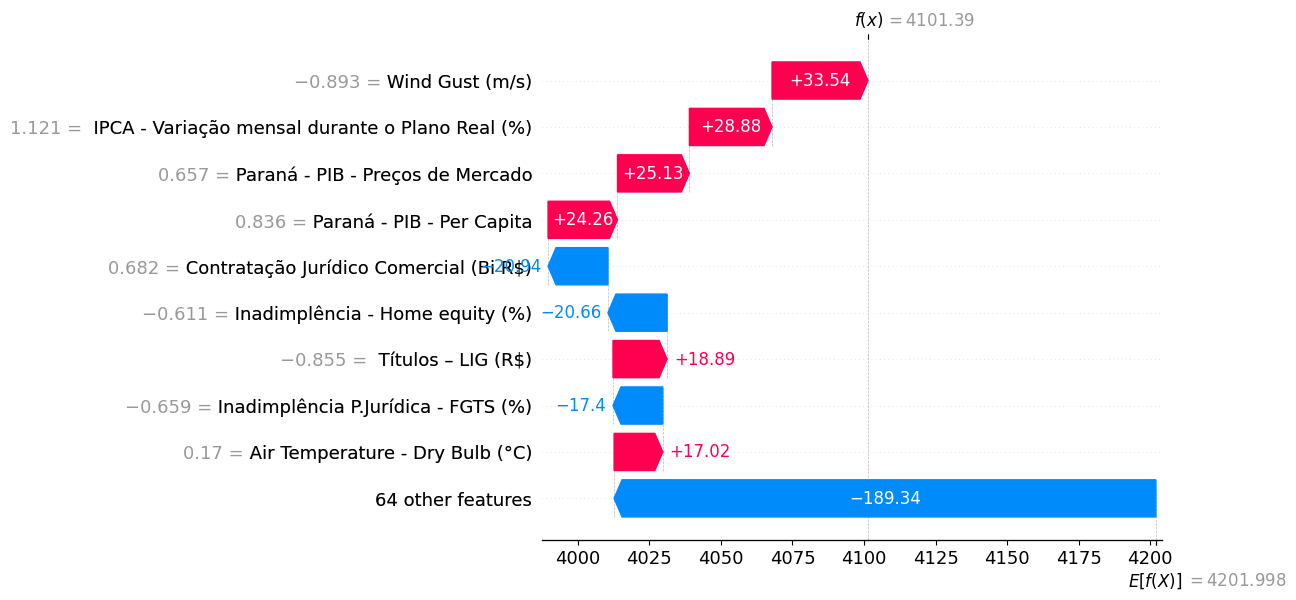

None

'TARGET: 4341.821857142857'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[ 18.89463121,   0.        ,   0.        , -20.49715613,
        -22.07902311, -15.37217898, -18.91078271,  -5.67710525,
        -17.3464168 ,  44.4332247 ,  12.66697995,  10.52965142,
        -29.36800276,  11.75963191, -44.86024508,   0.        ,
        -18.36555913, -46.83675999,   0.        , -22.6613145 ,
          0.        , -17.97252687,   0.        , -14.69457025,
        -17.20133411,   0.        ,   0.        ,  29.74733803,
         -9.3410512 ,  31.67043173,   0.        ,   0.        ,
        -72.40568515,   0.        ,  23.36404198,  -5.16588397,
         30.36671018,  30.97151127,   0.        ,  19.51891275,
         -2.37749728, -36.80058076,   0.        , -26.6996443 ,
          0.        ,  -9.13873579,   0.        ,   0.        ,
         14.82092945,   0.        ,  -5.43934761,   0.        ,
         -6.77233874, -39.18176696,   0.        ,   0.        ,
         14.44030008, -18.73727607,   0.        ,   0.        ,
          0.        , -17.67019791,  19.

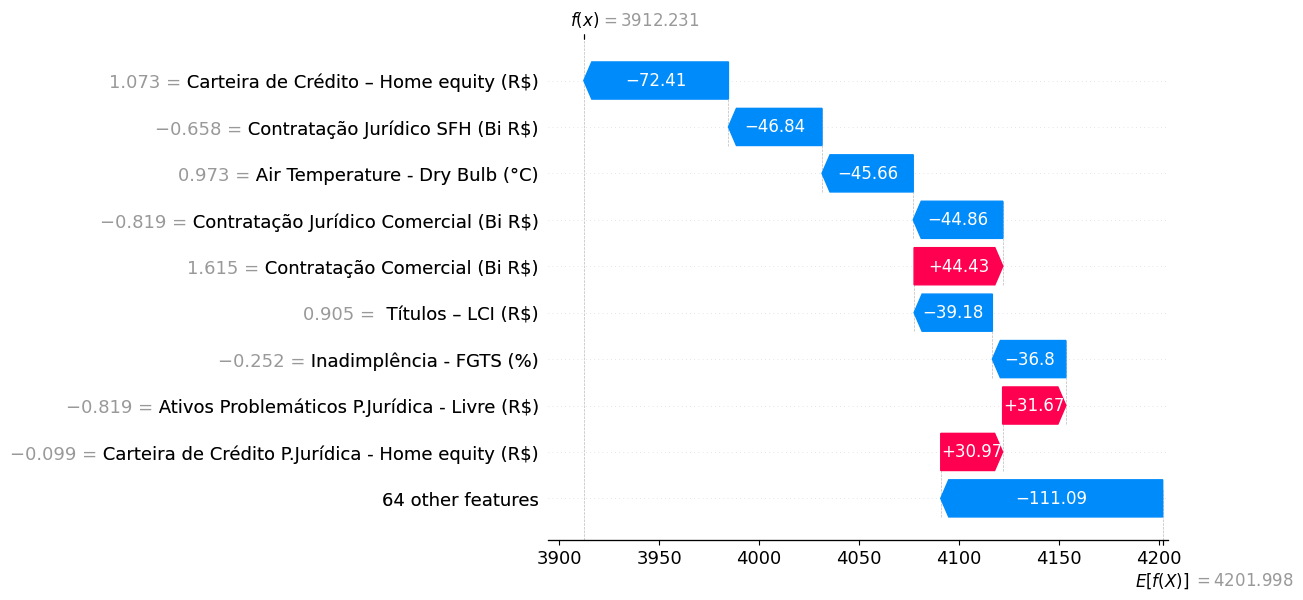

None

'TARGET: 4108.786285714286'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[  0.        ,  31.37544945,   0.        , -13.08585684,
         -9.97480278,   0.        , -13.46614287,   0.        ,
        -19.10408185,   0.        ,   0.        ,  -9.51902499,
         -9.51099222, -20.04501222, -18.61698315,   0.        ,
        -26.59829822, -25.00612976,   0.        ,  -4.55770081,
          0.        , -11.30225841,  -6.14178616, -23.41137985,
          0.        ,  -0.92345342,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -4.56075706,
          0.        , -14.07235301,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -6.9268973 , -28.33467975,   0.        ,
        -16.43869834,   0.        , -16.44306079,  -3.5122293 ,
          0.        ,  -3.24652652,   0.        ,   0.        ,
        -16.42561314,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -5.3587784 ,   0.        ,  27.

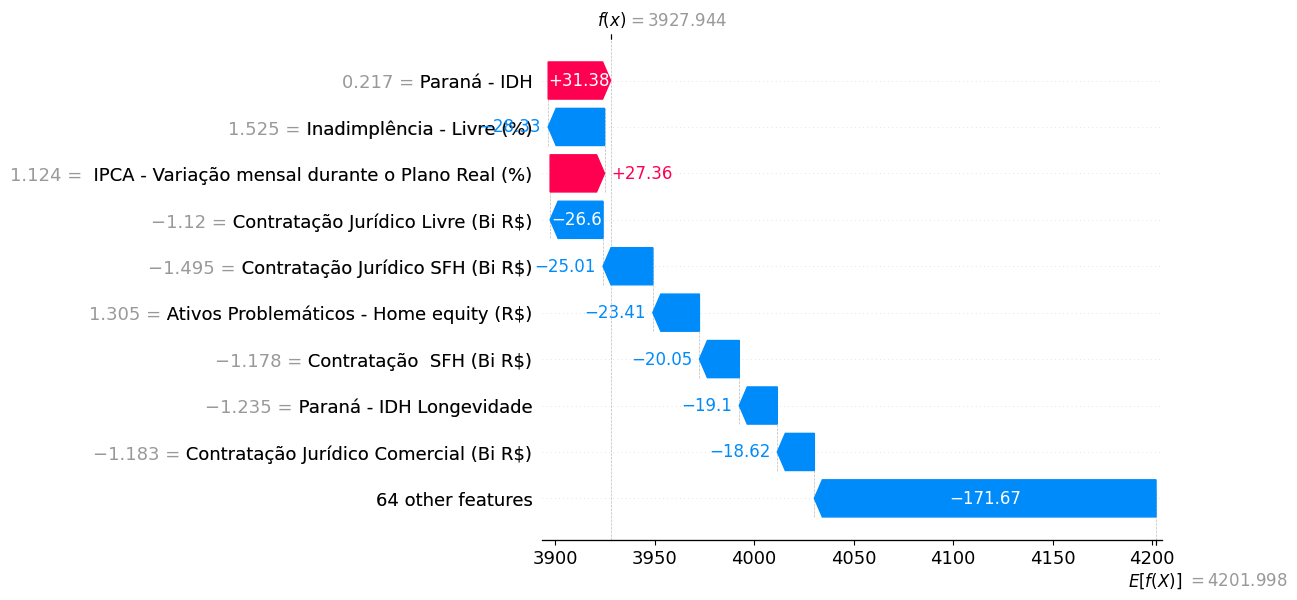

None

'TARGET: 3869.334857142857'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[ -6.98982934, -25.15724663,  -6.4688342 ,   0.        ,
          0.        ,  -0.77406548,  -3.22149222,   0.        ,
         -5.35334498,  -6.16732039,  -3.7401351 , -16.97722485,
          0.        ,  -4.6036518 , -11.25029366,   0.        ,
        -14.05417422,  -5.6136578 ,   0.        ,  -3.93464987,
          0.        ,  -9.45740444, -11.52429859,  -5.5192501 ,
        -23.31945697,   0.        ,   0.        ,  -6.10567154,
          0.        ,  -7.97826546,   0.        ,  -5.98653687,
          0.        ,   0.        ,   0.        ,   0.        ,
         -2.78589343,  -8.81648348,  -1.78587003,  -6.98453335,
          0.        ,  -6.36663335,  -4.45702055, -16.50859811,
        -11.58208545,   0.        ,  -3.97220216,   0.        ,
          0.        ,   0.        ,  -5.27755212,   0.        ,
         -4.21919822,  -4.03869135,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , -11.

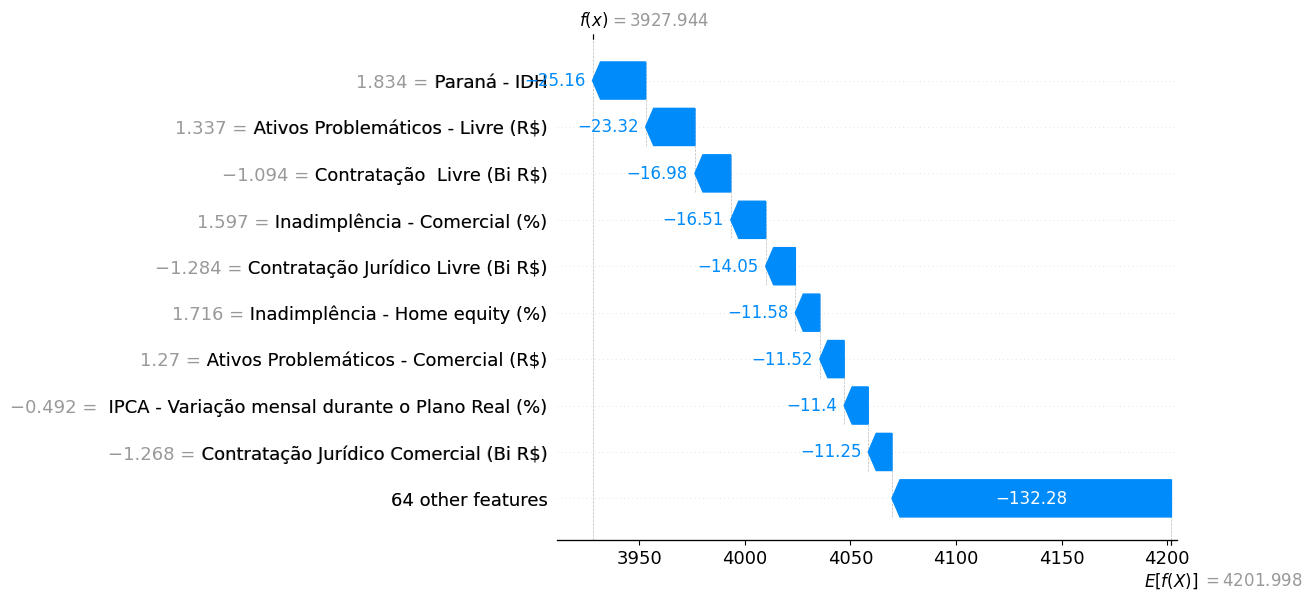

None

'TARGET: 3764.518'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[  0.        ,   0.        ,   0.        ,   0.        ,
         -7.2917873 ,  -2.92885405,   0.        ,   0.        ,
          0.        , -29.34184369, -10.85451674,  -8.0019725 ,
          0.        ,  -4.66718836,   0.        , -17.77522728,
         -8.87829293,   0.        ,  -3.21839372,   0.        ,
          0.        ,   0.        , -14.44909939,   0.        ,
          0.        ,   0.        ,  -6.87081642,  -3.31902406,
         -4.91057344, -12.78869517,  -4.39379126, -17.80567628,
        -11.04040695,  -6.8158066 ,   0.        ,   0.        ,
          0.        , -13.56577275, -12.179647  ,  -3.79523972,
          0.        , -15.80878507,   0.        ,  -4.42756765,
        -14.09225832,   0.        ,   0.        ,  -1.20088324,
        -10.44183093,  -5.64980208,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -3.91944948,  -7.

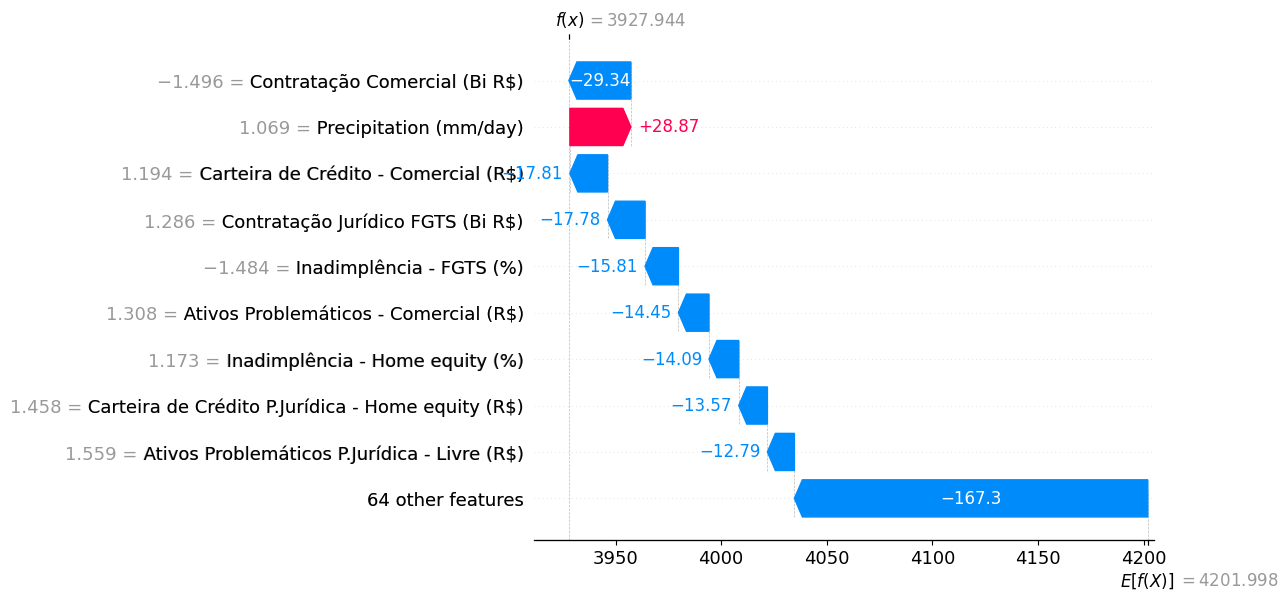

None

'TARGET: 3773.354'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[  0.        ,  -1.53932403,   0.        ,   0.        ,
         -1.61651296,   0.        ,   0.        ,   0.        ,
         -4.03113751,   0.        ,  -8.5237303 ,  -6.54394607,
          0.        ,  -9.03374493,   0.        , -10.32407425,
          0.        ,   0.        ,   0.        ,  -8.51525583,
          0.        ,   0.        ,  -8.13958564,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -8.1281141 ,   0.        ,  -4.676332  , -12.3854434 ,
          0.        ,   0.        ,  -9.84236892,   0.        ,
         -8.95458067,  -9.99191504, -21.00461519, -11.07672342,
         -2.43389115,  19.39084959,   0.        ,  24.20983295,
          0.        ,   0.        , -12.00177559,  -4.3073578 ,
        -13.43837573,  -5.54899185, -12.47810074,  -6.0632274 ,
         23.6207985 ,   0.        ,   0.        ,  -5.12488518,
          0.        , -15.48967234, -10.14601398,  -4.47347029,
        -11.8807272 ,   0.        , -24.

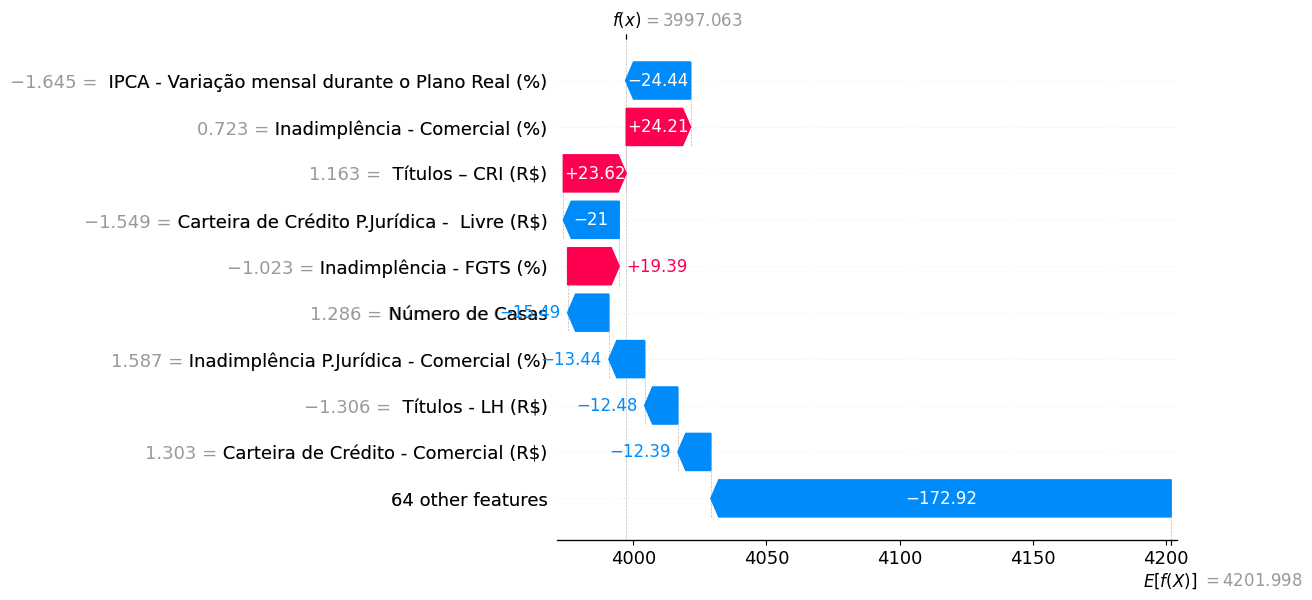

None

'TARGET: 3786.974'

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 1ms/step


array([[ -2.56006149,  -1.564529  ,  -2.79276248,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , -17.04684574,  -1.52139403,   0.        ,
          0.        ,  -3.36522197,   0.        ,   0.        ,
         -2.64979986,   0.        ,   0.        , -10.99501041,
         -6.89661857,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  -1.07047561, -10.01137433,
          0.        ,  -6.32606401,   0.        ,   0.        ,
          0.        ,  -3.0922695 , -10.23921642,   0.        ,
          0.        ,   0.        , -17.28802619,  -1.5602116 ,
          0.        ,   0.        ,   0.        ,   0.        ,
        -10.9604919 ,  -1.19221714,  -4.71848097,  -4.36193439,
        -11.32901343,  -1.21498709,   0.        , -18.99239029,
          0.        ,   0.        ,  -3.97662742,   0.        ,
         -1.85502232,  -6.19747412,  -2.87563708,  -1.84408641,
          0.        ,   0.        , -11.

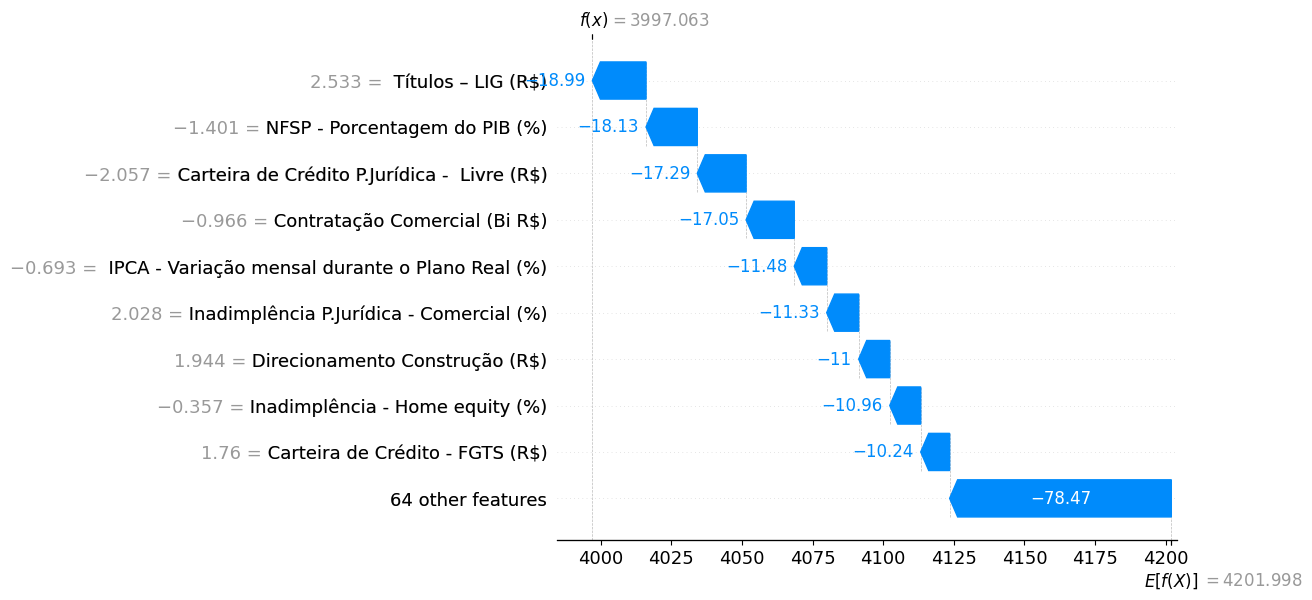

None

'TARGET: 4235.532'

In [26]:
for i in range(3, 12):
    current_input = train_input.iloc[i:i+1]
    shap_values = explainer.shap_values(current_input)
    display(shap_values[0])
    display(shap.force_plot(explainer.expected_value, shap_values[0], current_input))
    exp = shap.Explanation(shap_values[0], explainer.expected_value, current_input, feature_names=train_input.columns)
    display(shap.waterfall_plot(exp[0]))
    display("TARGET: " + str(target_data[i]))

  0%|          | 0/1 [00:00<?, ?it/s]

69/69 [==============================] - 0s 656us/step


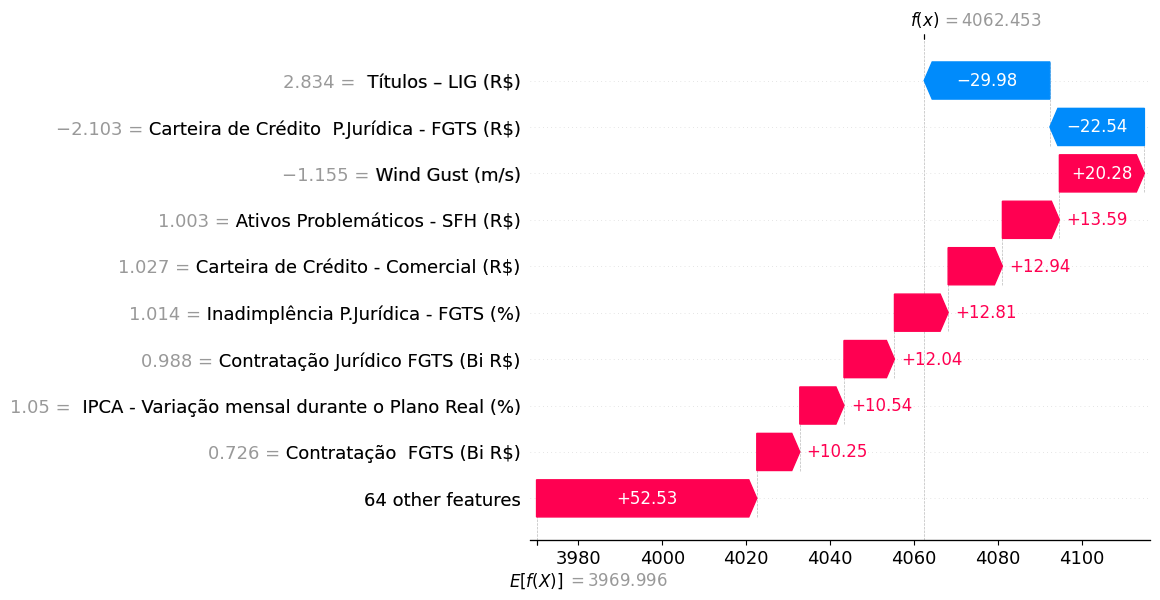

In [29]:
shap_values_2 = explainer.shap_values(test_input)
exp = shap.Explanation(shap_values_2[0], explainer.expected_value, test_input, feature_names=train_input.columns)
shap.waterfall_plot(exp[0])

In [30]:
shap_values_all = explainer.shap_values(train_input)
shap.force_plot(explainer.expected_value, shap_values_all[0], train_input)

  0%|          | 0/12 [00:00<?, ?it/s]

69/69 [==============================] - 0s 639us/step
